## **Praktikum Sistem Komunikasi Multimedia/Sistem dan Teknologi Multimedia**



---



* Nama: Rifko Satrio Rahmadani
* NIM: 231344057
* Kelas: 3B-TNK



## Modul 6: ELIAS DELTA - BAGIAN ENCODER

# Instruksi!

Sebelum melakukan pekerjaan di bawah, ada beberapa hal yang harus diperhatikan.

* Waktu pengerjaan sesuai dengan deadline pada GCR.
* GCR akan ditutup setelah jam tersebut.
* Waktu submit ke GCR berpengaruh pada nilai, lebih cepat akan mendapat nilai tambahan.
* Jika ada kendala saat upload file ipynb, maka bisa dengan menyematkan link google collabnya pada kolom submission tugas di GCR.
* Jika ada pertanyaan bisa diajukan di grup perkuliahan.

*selamat mengerjakan*

### Pendahuluan





---



**Elias Delta Coding**

Seperti Elias Gamma, kode ini ditemukan oleh Peter Elias. Kode ini menerapkan juga metode
pada gamma coding, terutama di bagian kepala. Tekniknya adalah sebagai berikut:
1. Cari pangkat tertinggi binernya, misalnya desimal 11 jika dibinerkan menjadi 1011 dimana
pangkat tertingginya adalah 3. Jadi N’=3.
2. Gunakan Gamma Coding untuk mengkodekan bilangan N dimana N=N’+1. Jadi untuk
kasus desimal 11 maka kita harus membuat Gamma Coding dari 4 yaitu 00100.
3. Tambahkan sisa N’ binary pada hasil no.2. Jadi diperoleh jawaban 00100011.
Jika diberikan deretan angka 35, 101, dan 112, maka akan didapatkan output dengan metode Elias Delta Code sebagai berikut:

00110000110011110010100111110000


---

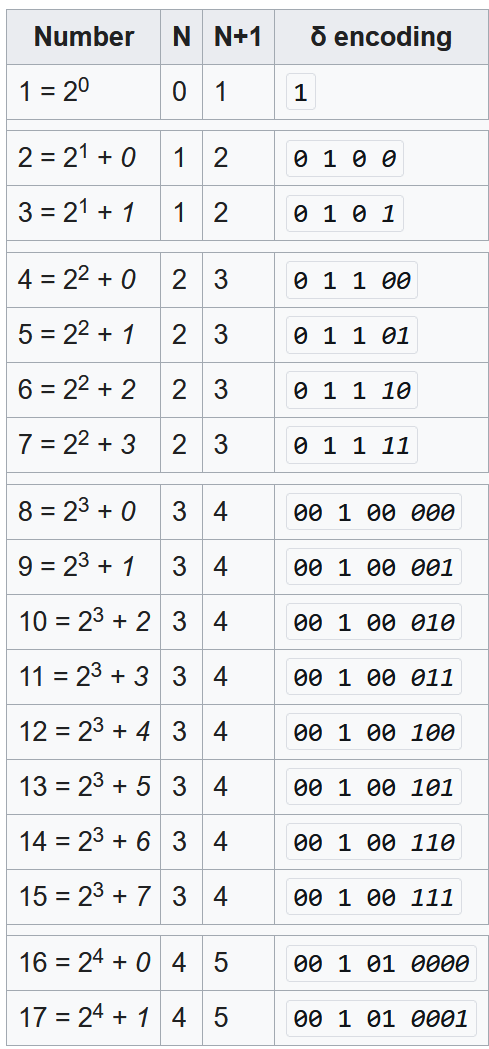

### Langkah-langkah Percobaan

1. Buat function untuk melakukan encoding dan decoding elias gamma

2. Buat program encoding untuk elias delta untuk data 19, 32, 3, 14, 89, 27
3. Gunakan output encoding dari elias delta sebagai input dari program decoding elias delta. Dan buat program decodingnya

4. Lampirkan flowchart untuk encoding dan decoding.

**Instruksi:**





### Buat function Encoding Elias Gamma

In [ ]:
def gamma_encode(n):
    biner = format(n, 'b')
    nol_di_depan = '0' * (len(biner) - 1)
    return nol_di_depan + biner



### Buat Program Encoding untuk Elias Delta


In [ ]:
# Program utama Elias Delta
data = [19, 32, 3, 14, 89, 7]
output = []

for angka in data:
    # 1. Konversi angka ke biner
    biner = bin(angka)[2:]
    N = len(biner)

    # 2. Hitung M = N - 1
    M = N - 1

    # 3. Encode M dengan Elias Gamma
    gamma_M = gamma_encode(M)

    # 4. Ambil ekor biner (buang bit pertama)
    ekor = biner[1:]

    # 5. Gabungkan hasil
    delta_code = gamma_M + ekor
    output.append(delta_code)
    hasil_akhir = ''.join(output)

print("Data asli:", data)
print("Hasil Elias Delta:", hasil_akhir)

Data asli: [19, 32, 3, 14, 89, 7]
Hasil Elias Delta: 0010000110010100000110111100011001100101011




> Analisa dari program di atas:

*Program ini intinya dipakai buat ngubah data angka biasa jadi kode Elias Delta. Caranya, tiap angka diubah dulu ke biner, terus dihitung panjang binernya. Dari panjang itu dikurangi satu (M), lalu M dikodekan pakai fungsi Elias Gamma (yang udah dibuat di modul sebelumnya). Setelah itu, biner asli dibuang bit pertamanya, sisanya digabung sama hasil Gamma tadi. Hasil akhirnya adalah kode Elias Delta dari angka tersebut.*

*Dengan fungsi Elias Gamma ini diambil dari program yang sudah dikerjakan di modul 5 pada soal Elias Gamma Encoding, lalu disesuaikan supaya bisa dijadikan fungsi. Jadi, program di modul 6 tidak perlu bikin ulang dari nol, cukup memanggil fungsi Gamma yang sudah ada dan menggunakannya untuk proses Delta.*


Lampirkan gambar flowchart di bawah ini:

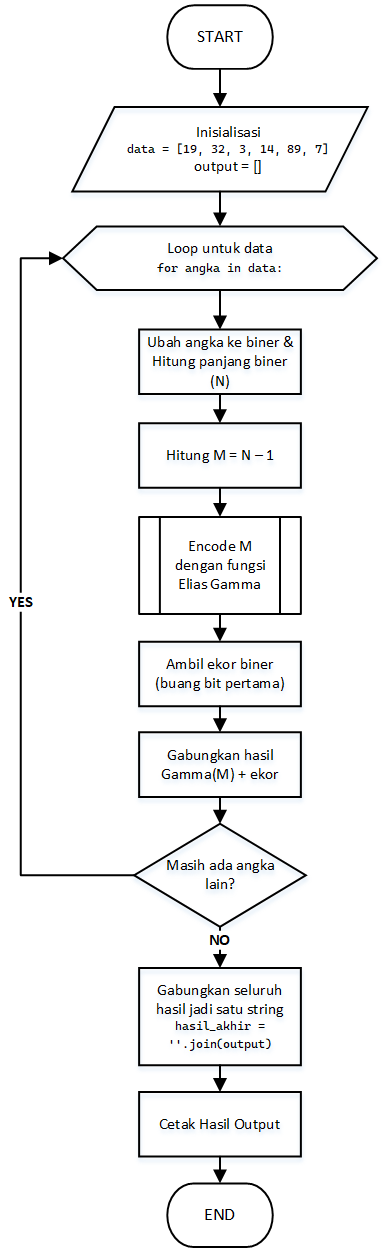

---



**Elias Delta Decoding**

Berikutnya adalah melakukan decode menggunakan Elias Delta Coding, prinsipnya adalaH kebalikan dari langkah satu sampai tiga di atas. Misalnya kita akan mendekode 00100011.

1. Temukan jumlah zero sebelum ditemukan angka satu, yaitu 00 atau berjumlah 2 bit. Berarti ada (2+1) angka yang harus diperhatikan setelah dua angka nol ini, yaitu 100. DiMana angka 100 jika dikonversikan dalam desimalnya berarti 4, jadi kita mendapatkan N’ dengan N-1 atau 4-1 = 3.
2. Jika N’ telah diketahui (yaitu 3) maka ada 3 bit tersisa yang menjadi bagian bilangan itu yakni 011. Jadi diperoleh jawaban 1011 (ditambahkan digit 1 di depan biner sebelumnya) yang artinya 11.



---



### Buat Program Decoding untuk Elias Delta

In [ ]:
data = '0010000110010100000110111100011001100101011'  # Data hasil encoding
hasil = []    # Untuk menyimpan hasil angka desimal
i = 0         # Posisi pembacaan bit

while i < len(data):
    # 1. Hitung jumlah angka '0' di awal
    jumlah_nol = 0
    while i < len(data) and data[i] == '0':
        jumlah_nol += 1
        i += 1
    if i >= len(data): # Jika sudah tidak ada data, hentikan
        break

    start_gamma = i # 2. Ambil bagian gamma (mulai dari '1' pertama, panjang = jumlah_nol + 1)
    end_gamma = i + jumlah_nol + 1
    segmen_gamma = data[start_gamma:end_gamma]

    M = int(segmen_gamma, 2) # 3. Ubah bagian gamma menjadi desimal → ini adalah nilai M

    N = M + 1 # 4. Panjang biner asli (N) = M + 1

    start_ekor = end_gamma # 5. Ambil bagian ekor sepanjang (N - 1) bit setelah segmen gamma
    end_ekor = start_ekor + (N - 1)
    ekor = data[start_ekor:end_ekor]
    biner_asli = '1' + ekor # 6. Tambahkan '1' di depan ekor → menjadi biner asli

    angka_asli = int(biner_asli, 2)   # 7. Ubah ke desimal

    hasil.append(angka_asli) # 8. Simpan ke dalam list hasil

    i = end_ekor    # 9. Pindah posisi baca ke akhir ekor

# 10. Cetak hasil
print("Data Elias Delta :", data)
print("Hasil decoding   :", hasil)


Data Elias Delta : 0010000110010100000110111100011001100101011
Hasil decoding   : [19, 32, 3, 14, 89, 7]




> Analisa dari program di atas:

*Program di atas berfungsi untuk mengubah kembali data hasil encoding Elias Delta menjadi angka-angka desimal aslinya. Cara kerjanya yaitu dengan membaca deretan bit dari kiri ke kanan. Pertama, program menghitung jumlah angka nol di awal untuk mengetahui panjang bagian gamma. Setelah bertemu angka satu, bagian gamma diambil dan diubah ke desimal sebagai nilai M, lalu dihitung panjang biner aslinya yaitu N = M + 1. Setelah itu, diambil bagian ekor sebanyak N - 1 bit dan ditambahkan angka ‘1’ di depannya agar menjadi biner lengkap. Nilai biner tersebut kemudian dikonversi ke desimal dan disimpan ke dalam list hasil. Proses ini berulang sampai seluruh bit terbaca. Hasil akhirnya menunjukkan angka-angka asli sebelum melalui proses encoding, yaitu [19, 32, 3, 14, 89, 7]*



Lampirkan gambar flowchart di bawah ini:

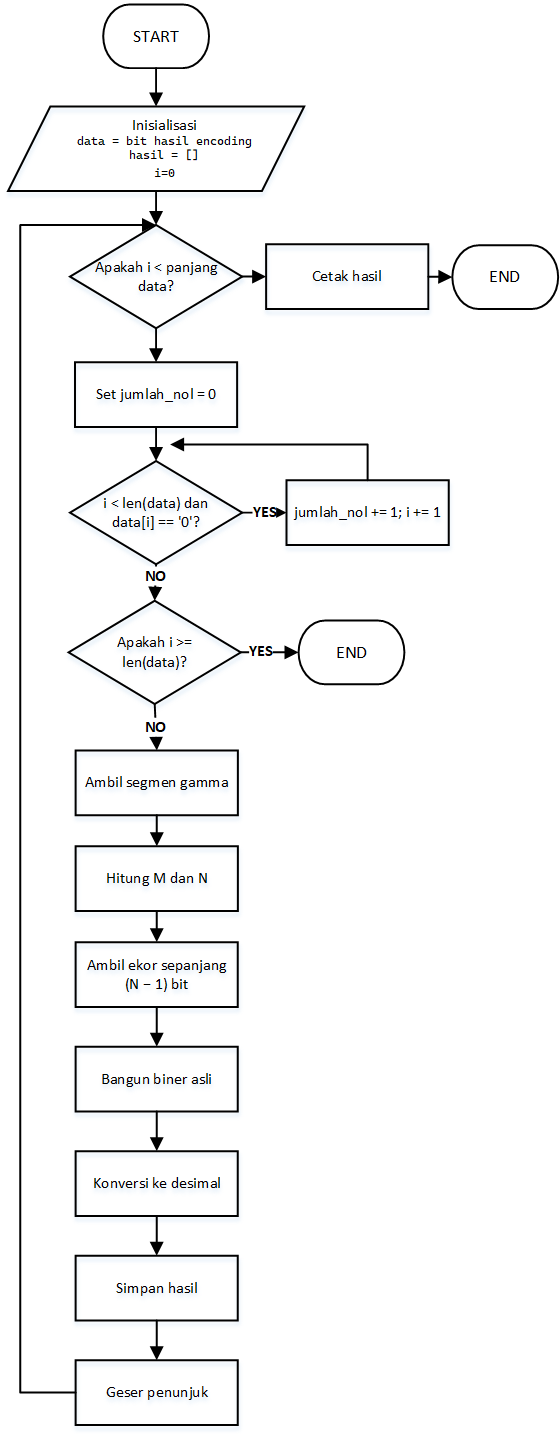


© Prof. Hertog Nugroho, Teguh Ginanjar S.T., M.T, & Muhammad Yusuf Fadhlan, SST., M.Sc.

Politeknik Negeri Bandung (2023)